# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Carregar X_train, Y_train, X_test, Y_test
X_train = pd.read_csv(r"C:\Users\vinic\Exercicios\M17\X_train_selected.csv", index_col=0)  # Certifique-se de ajustar o caminho do arquivo
Y_train = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\train\y_train.txt', index_col=0)
X_test = pd.read_csv(r"C:\Users\vinic\Exercicios\M17\X_test_selected.csv", index_col=0)
Y_test = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\test\y_test.txt', index_col=0)

# Verificar as primeiras linhas para garantir que as bases foram carregadas corretamente
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  subject.1
subject                                                                    
1                 0.288585          -0.020294          -0.132905          1
1                 0.278419          -0.016411          -0.123520          1
1                 0.279653          -0.019467          -0.113462          1
1                 0.279174          -0.026201          -0.123283          1
1                 0.276629          -0.016570          -0.115362          1
Empty DataFrame
Columns: []
Index: [5, 5, 5, 5, 5]
         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  subject.1
subject                                                                    
2                 0.257178          -0.023285          -0.014654          2
2                 0.286027          -0.013163          -0.119083          2
2                 0.275485          -0.026050          -0.118152          2
2                 0.270298          -

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7352, 4)
(7351, 0)
(2947, 4)
(2946, 0)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [9]:
X_train = X_train.iloc[:7351, :]

In [23]:
# Definir a pasta onde os arquivos estão localizados
data_folder = "UCI HAR Dataset"

# Carregar os dados
X_train = pd.read_csv("X_train_selected.csv", index_col=0)
Y_train = pd.read_csv(os.path.join(data_folder, "train", "y_train.txt"), header=None, names=["activity"])
X_test = pd.read_csv("X_test_selected.csv", index_col=0)
Y_test = pd.read_csv(os.path.join(data_folder, "test", "y_test.txt"), header=None, names=["activity"])

# Dividir a base de treino em treino e validação (75% treino, 25% validação)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Ajustar árvore de decisão com min_samples_leaf=20
decision_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
decision_tree.fit(X_train, Y_train)

# Calcular ccp_alphas
path = decision_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas > 0])

# Selecionar apenas 1 a cada 5 valores de ccp_alpha
ccp_alphas_subset = ccp_alphas[::5]

print("Valores de ccp_alpha selecionados:", ccp_alphas_subset)

Valores de ccp_alpha selecionados: [9.70046647e-06 6.90039545e-05 1.07070480e-04 1.45085238e-04
 2.06813574e-04 2.35082894e-04 2.45021274e-04 2.71671512e-04
 2.87357874e-04 3.08052129e-04 3.17161667e-04 3.27650828e-04
 3.41908122e-04 3.51606557e-04 3.88660466e-04 4.11023171e-04
 4.28702346e-04 4.49425343e-04 4.84919061e-04 5.08873568e-04
 5.41478833e-04 5.66580681e-04 5.92780827e-04 6.61246357e-04
 7.28360253e-04 7.45483191e-04 8.48058343e-04 9.70444563e-04
 1.11294748e-03 1.35368015e-03 1.66947555e-03 2.24893570e-03
 2.93295969e-03 4.26652009e-03 5.54335174e-03 9.03775267e-03]


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [25]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Definir a pasta onde os arquivos estão localizados
data_folder = "UCI HAR Dataset"

# Carregar os dados
X_train = pd.read_csv("X_train_selected.csv", index_col=0)
Y_train = pd.read_csv(os.path.join(data_folder, "train", "y_train.txt"), header=None, names=["activity"])
X_test = pd.read_csv("X_test_selected.csv", index_col=0)
Y_test = pd.read_csv(os.path.join(data_folder, "test", "y_test.txt"), header=None, names=["activity"])

# Dividir a base de treino em treino e validação (75% treino, 25% validação)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Ajustar árvore de decisão com profundidade máxima igual a 4
decision_tree_full = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree_full.fit(X_train, Y_train)

# Obter importância das variáveis
feature_importances = decision_tree_full.feature_importances_
feature_names = X_train.columns

# Selecionar as 3 variáveis mais importantes
important_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)[:3]
important_feature_names = [feature[0] for feature in important_features]

print("Três variáveis mais importantes:", important_feature_names)

# Ajustar árvore de decisão com min_samples_leaf=20 usando apenas as 3 variáveis mais importantes
X_train_selected = X_train[important_feature_names]
X_val_selected = X_val[important_feature_names]
X_test_selected = X_test[important_feature_names]

decision_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
decision_tree.fit(X_train_selected, Y_train)

# Calcular ccp_alphas
path = decision_tree.cost_complexity_pruning_path(X_train_selected, Y_train)
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas > 0])

# Selecionar apenas 1 a cada 5 valores de ccp_alpha
ccp_alphas_subset = ccp_alphas[::5]

print("Valores de ccp_alpha selecionados:", ccp_alphas_subset)


Três variáveis mais importantes: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
Valores de ccp_alpha selecionados: [9.70046647e-06 7.15114946e-05 1.12305284e-04 1.74102968e-04
 2.09119319e-04 2.15209769e-04 2.32985960e-04 2.44611650e-04
 2.78511840e-04 3.01561638e-04 3.09707079e-04 3.17562251e-04
 3.49182342e-04 3.56777944e-04 3.87805822e-04 4.09865796e-04
 4.28702346e-04 4.42384384e-04 4.67084355e-04 4.92197656e-04
 5.30811767e-04 5.66580681e-04 5.97036652e-04 6.61246357e-04
 6.72674860e-04 7.45483191e-04 9.02027507e-04 1.01657158e-03
 1.32034174e-03 1.45336392e-03 1.93582859e-03 2.44366701e-03
 3.33963650e-03 4.52695015e-03 5.92471885e-03]


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

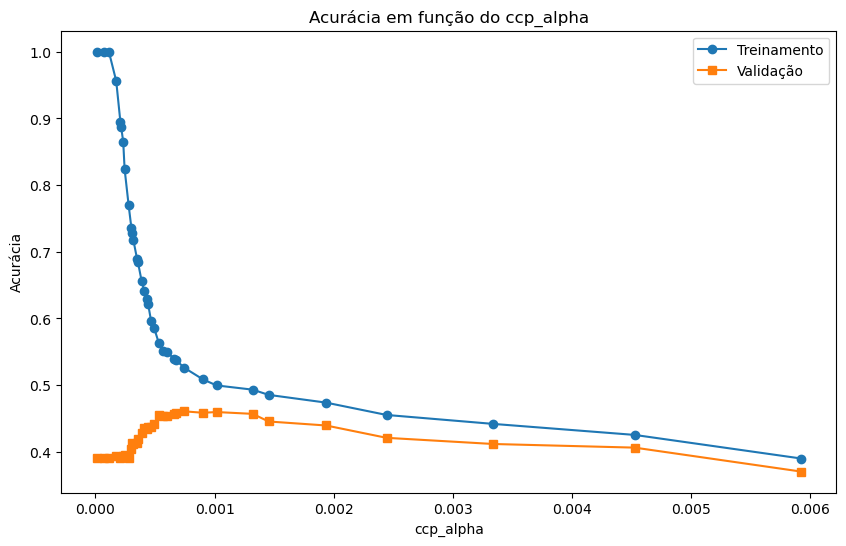

Melhor ccp_alpha: 0.0007454831910129467
Melhor acurácia na base de validação: 0.46082698585418935
Acurácia no conjunto de teste: 0.4462164913471327


In [27]:
# Testar diferentes valores de ccp_alpha
accuracies_train = []
accuracies_val = []
trees = []

for ccp_alpha in ccp_alphas_subset:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train_selected, Y_train)
    trees.append(tree)
    
    acc_train = accuracy_score(Y_train, tree.predict(X_train_selected))
    acc_val = accuracy_score(Y_val, tree.predict(X_val_selected))
    
    accuracies_train.append(acc_train)
    accuracies_val.append(acc_val)

# Plotar a acurácia em função do ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_subset, accuracies_train, marker='o', label='Treinamento')
plt.plot(ccp_alphas_subset, accuracies_val, marker='s', label='Validação')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia em função do ccp_alpha')
plt.show()

# Selecionar a melhor árvore (com melhor acurácia na base de validação)
best_index = np.argmax(accuracies_val)
best_tree = trees[best_index]
print(f"Melhor ccp_alpha: {ccp_alphas_subset[best_index]}")
print(f"Melhor acurácia na base de validação: {accuracies_val[best_index]}")

# Avaliar no conjunto de teste
acc_test = accuracy_score(Y_test, best_tree.predict(X_test_selected))
print(f"Acurácia no conjunto de teste: {acc_test}")


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia na base de teste: 0.4462


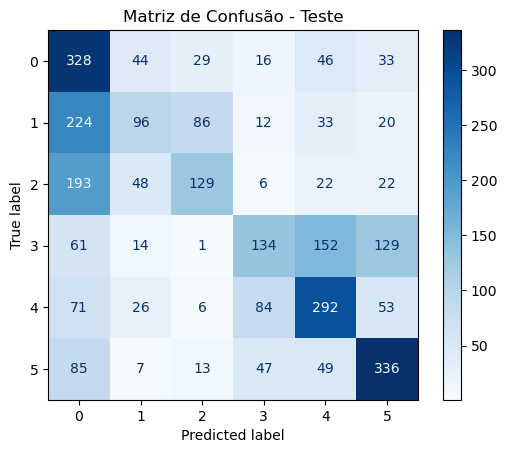

In [29]:
# Fazer previsões na base de teste
y_pred_test = best_tree.predict(X_test_selected)

# Calcular a acurácia na base de teste
accuracy_test = accuracy_score(Y_test, y_pred_test)
print(f"Acurácia na base de teste: {accuracy_test:.4f}")

# Gerar e exibir a matriz de confusão
cm = confusion_matrix(Y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Teste")
plt.show()
